## Import

In [34]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

import pathlib
from typing import Any,Union   

In [35]:
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
True


## Def

In [36]:
BATCH_SIZE:int  = 64
IMG_HEIGHT:int  = 227
IMG_WIDTH:int   = 227

# Valdiate 20% 
VAL_SPLIT:float = 0.2

model = {}


In [37]:
def get_dataset_dir(path) -> str:
    return pathlib.Path(path)

In [38]:
def load_dataset(dir) -> Union[list | Any, list | Any]:
  train_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    label_mode='binary',
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    label_mode='binary',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  return train_ds, val_ds

In [39]:
def print_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Sketch

### Load Dataset

In [40]:
data_dir:str = get_dataset_dir('data_multi_binary/train/sketch')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 198 files belonging to 2 classes.
Using 159 files for training.
Found 198 files belonging to 2 classes.
Using 39 files for validation.


### Model and Train

In [41]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['sketch'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['sketch'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    history:tf.keras.callbacks.History = model['sketch'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/15
3/3 [==============================] - 9s 3s/step - loss: 1.6961 - accuracy: 0.5220 - val_loss: 1.5437 - val_accuracy: 0.4872
Epoch 2/15
3/3 [==============================] - 9s 4s/step - loss: 0.8347 - accuracy: 0.5975 - val_loss: 0.6890 - val_accuracy: 0.5128
Epoch 3/15
3/3 [==============================] - 8s 3s/step - loss: 0.6812 - accuracy: 0.5535 - val_loss: 0.6616 - val_accuracy: 0.9231
Epoch 4/15
3/3 [==============================] - 9s 4s/step - loss: 0.6606 - accuracy: 0.4969 - val_loss: 0.6329 - val_accuracy: 0.4615
Epoch 5/15
3/3 [==============================] - 8s 3s/step - loss: 0.5759 - accuracy: 0.6667 - val_loss: 0.5800 - val_accuracy: 0.8205
Epoch 6/15
3/3 [==============================] - 8s 3s/step - loss: 0.5112 - accuracy: 0.7358 - val_loss: 0.4867 - val_accuracy: 0.8462
Epoch 7/15
3/3 [==============================] - 8s 3s/step - loss: 0.4201 - accuracy: 0.8302 - val_loss: 0.4331 - val_accuracy: 0.8205
Epoch 8/15
3/3 [=========================

### Validate

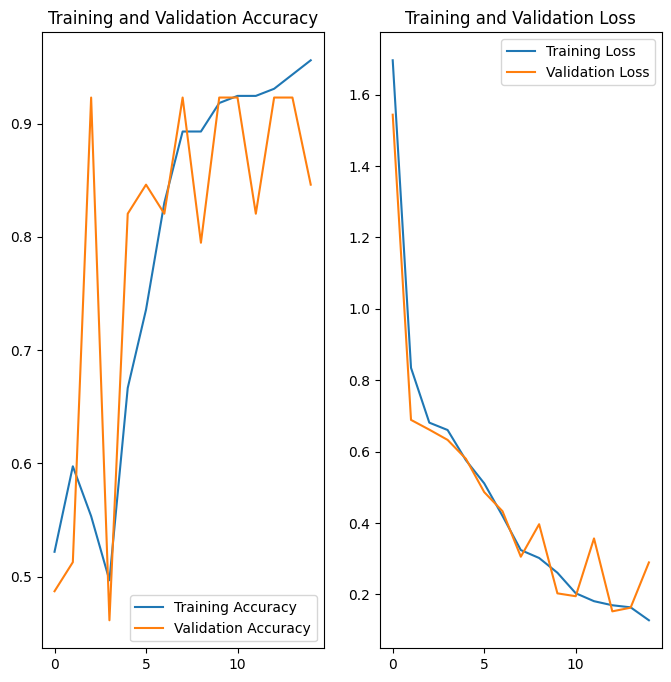

In [42]:
print_history(history)

## Text

### Load Dataset

In [43]:
data_dir:str = get_dataset_dir('data_multi_binary/train/text')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [44]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['text'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['text'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    history:tf.keras.callbacks.History = model['text'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/15
3/3 [==============================] - 10s 4s/step - loss: 1.3572 - accuracy: 0.5188 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 9s 3s/step - loss: 0.7791 - accuracy: 0.5188 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 9s 3s/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 4/15
3/3 [==============================] - 9s 3s/step - loss: 0.6647 - accuracy: 0.5437 - val_loss: 0.6656 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 9s 4s/step - loss: 0.6133 - accuracy: 0.5625 - val_loss: 0.6174 - val_accuracy: 0.6250
Epoch 6/15
3/3 [==============================] - 9s 4s/step - loss: 0.5633 - accuracy: 0.7875 - val_loss: 0.5719 - val_accuracy: 0.6000
Epoch 7/15
3/3 [==============================] - 9s 4s/step - loss: 0.4884 - accuracy: 0.8062 - val_loss: 0.5073 - val_accuracy: 0.7000
Epoch 8/15
3/3 [========================

### Validate

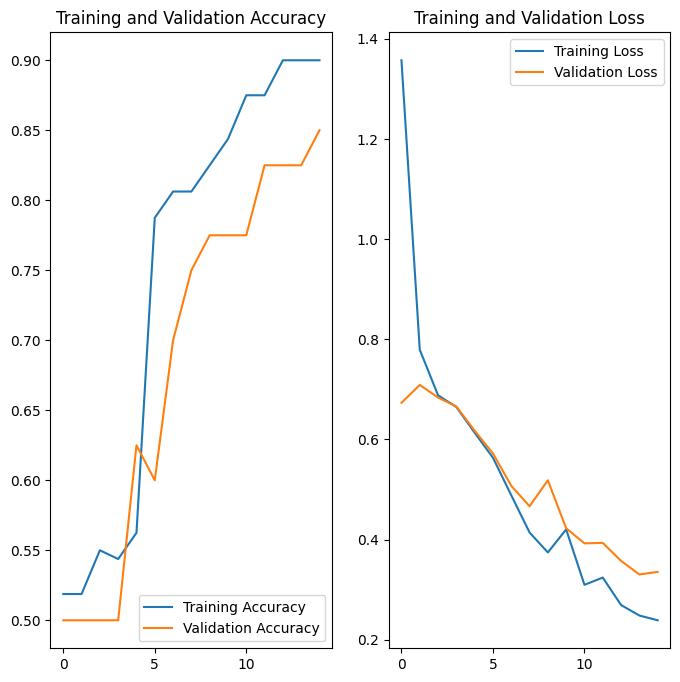

In [45]:
print_history(history)

## Schematics

### Load Dataset

In [46]:
data_dir:str = get_dataset_dir('data_multi_binary/train/schematics')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 273 files belonging to 2 classes.
Using 219 files for training.
Found 273 files belonging to 2 classes.
Using 54 files for validation.


### Model and Train

In [47]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['schematics'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['schematics'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    history:tf.keras.callbacks.History = model['schematics'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/15
4/4 [==============================] - 15s 4s/step - loss: 1.3300 - accuracy: 0.5068 - val_loss: 0.7449 - val_accuracy: 0.2778
Epoch 2/15
4/4 [==============================] - 13s 3s/step - loss: 0.6989 - accuracy: 0.5890 - val_loss: 0.6220 - val_accuracy: 0.7222
Epoch 3/15
4/4 [==============================] - 13s 4s/step - loss: 0.6807 - accuracy: 0.5982 - val_loss: 0.6654 - val_accuracy: 0.7222
Epoch 4/15
4/4 [==============================] - 14s 3s/step - loss: 0.6779 - accuracy: 0.5753 - val_loss: 0.6579 - val_accuracy: 0.7222
Epoch 5/15
4/4 [==============================] - 13s 3s/step - loss: 0.6858 - accuracy: 0.6210 - val_loss: 0.6242 - val_accuracy: 0.7222
Epoch 6/15
4/4 [==============================] - 13s 3s/step - loss: 0.6686 - accuracy: 0.6027 - val_loss: 0.6310 - val_accuracy: 0.7222
Epoch 7/15
4/4 [==============================] - 15s 4s/step - loss: 0.6756 - accuracy: 0.6119 - val_loss: 0.6290 - val_accuracy: 0.7222
Epoch 8/15
4/4 [==================

### Validate

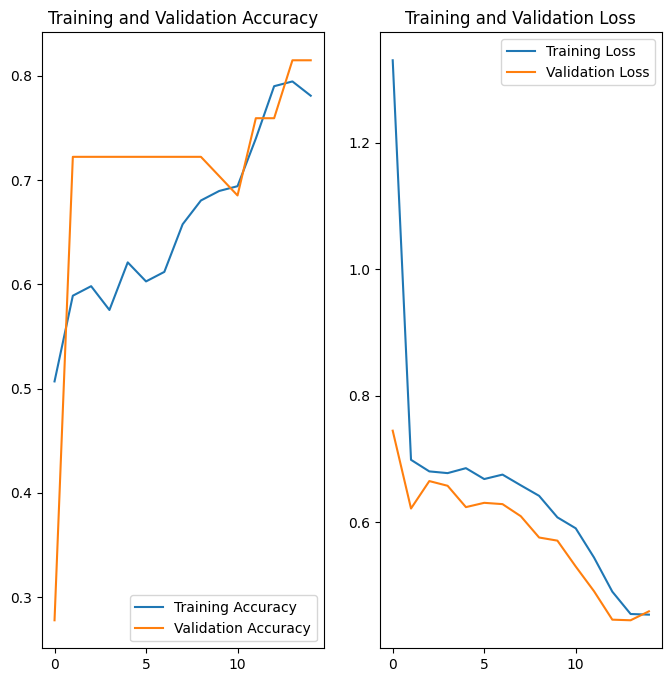

In [48]:
print_history(history)

## Painting

### Load Dataset

In [49]:
data_dir:str = get_dataset_dir('data_multi_binary/train/painting')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [50]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['painting'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['painting'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    history:tf.keras.callbacks.History = model['painting'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/15
3/3 [==============================] - 12s 4s/step - loss: 1.3117 - accuracy: 0.4437 - val_loss: 0.7913 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 11s 3s/step - loss: 0.7641 - accuracy: 0.5312 - val_loss: 0.6764 - val_accuracy: 0.5250
Epoch 3/15
3/3 [==============================] - 10s 3s/step - loss: 0.6693 - accuracy: 0.7000 - val_loss: 0.6295 - val_accuracy: 0.8000
Epoch 4/15
3/3 [==============================] - 10s 4s/step - loss: 0.6211 - accuracy: 0.7563 - val_loss: 0.5637 - val_accuracy: 0.7750
Epoch 5/15
3/3 [==============================] - 10s 4s/step - loss: 0.5605 - accuracy: 0.7812 - val_loss: 0.4423 - val_accuracy: 0.8750
Epoch 6/15
3/3 [==============================] - 10s 3s/step - loss: 0.5141 - accuracy: 0.7250 - val_loss: 0.4490 - val_accuracy: 0.7500
Epoch 7/15
3/3 [==============================] - 9s 3s/step - loss: 0.4773 - accuracy: 0.7500 - val_loss: 0.3618 - val_accuracy: 0.9000
Epoch 8/15
3/3 [===================

### Validate

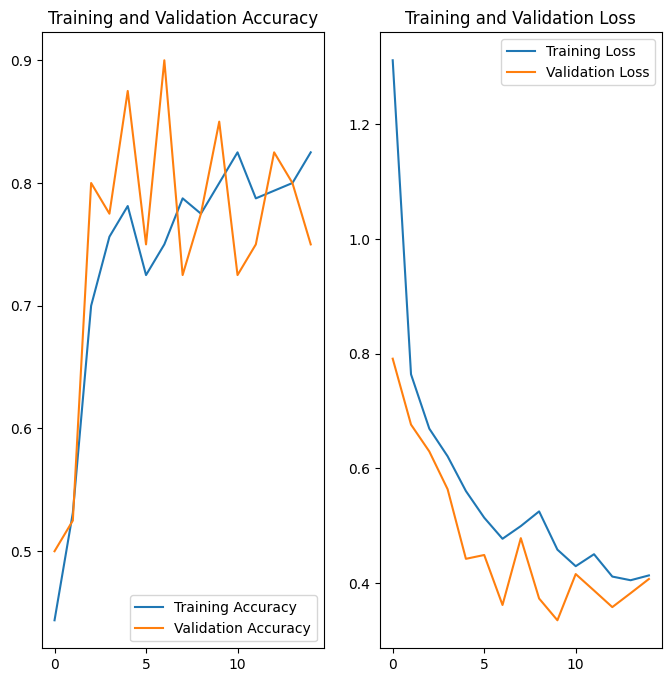

In [51]:
print_history(history)

## Photo

### Load Dataset

In [52]:
data_dir:str = get_dataset_dir('data_multi_binary/train/photo')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [53]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['photo'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['photo'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    history:tf.keras.callbacks.History = model['photo'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/15
3/3 [==============================] - 8s 3s/step - loss: 1.2533 - accuracy: 0.5875 - val_loss: 0.8156 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 7s 2s/step - loss: 0.7552 - accuracy: 0.5875 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 7s 3s/step - loss: 0.6775 - accuracy: 0.5500 - val_loss: 0.6584 - val_accuracy: 0.5000
Epoch 4/15
3/3 [==============================] - 8s 3s/step - loss: 0.6450 - accuracy: 0.6438 - val_loss: 0.6105 - val_accuracy: 0.6250
Epoch 5/15
3/3 [==============================] - 10s 3s/step - loss: 0.6003 - accuracy: 0.6438 - val_loss: 0.5690 - val_accuracy: 0.7000
Epoch 6/15
3/3 [==============================] - 10s 3s/step - loss: 0.5657 - accuracy: 0.6875 - val_loss: 0.5439 - val_accuracy: 0.7500
Epoch 7/15
3/3 [==============================] - 10s 4s/step - loss: 0.5160 - accuracy: 0.7250 - val_loss: 0.5416 - val_accuracy: 0.7500
Epoch 8/15
3/3 [======================

### Validate

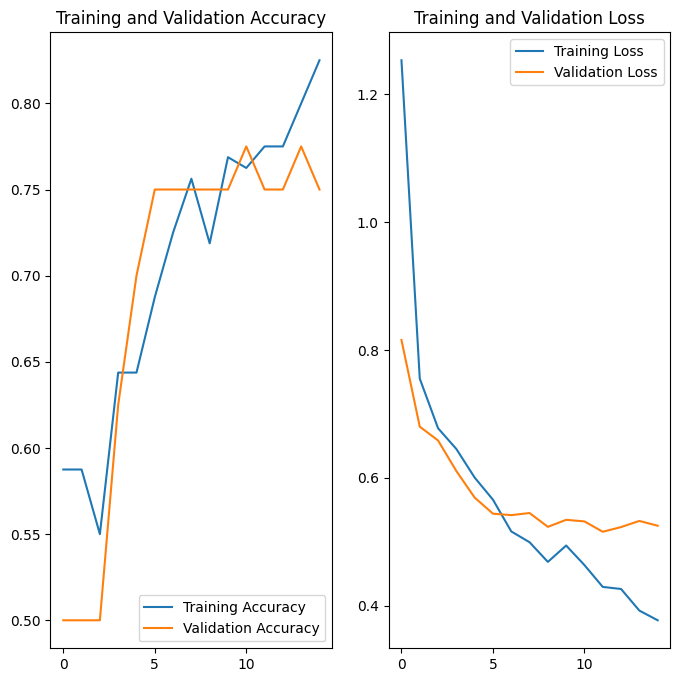

In [54]:
print_history(history)

## Test

In [55]:
test_images = tf.keras.utils.image_dataset_from_directory(
    'data_multi_binary/validation',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    # validation_split=VAL_SPLIT,
    # subset="training",
    # seed=123,
    #batch_size=BATCH_SIZE
)

class_names = test_images.class_names
print(class_names)
i = 0
error = 0

for b_images, b_labels in test_images.take(-1):
    predictions = model['text'].predict(b_images, verbose=0)
    
    for image, label, prediction in zip(b_images, b_labels, predictions) :
        print(class_names[label.numpy()],'text',int(np.round(prediction)))
        if not int(np.round(prediction)):

            batch_img = tf.expand_dims(image, 0)
            predictions = model['sketch'].predict(batch_img, verbose=0)
                
            print(class_names[label.numpy()],'sketch',int(np.round(predictions[0])))
            if not int(np.round(predictions[0])):
                predictions = model['schematics'].predict(batch_img, verbose=0)
                print(class_names[label.numpy()],'schematics',int(np.round(predictions[0])))
                if not int(np.round(predictions[0])):
                    predictions = model['painting'].predict(batch_img, verbose=0)
                    print(class_names[label.numpy()],'painting',int(np.round(predictions[0])))
                    if not int(np.round(predictions[0])):
                        predictions = model['photo'].predict(batch_img, verbose=0)
                        print(class_names[label.numpy()],'photo',int(np.round(predictions[0])))
                        if not int(np.round(predictions[0])):
                            print('isPhoto')
                            if class_names[label.numpy()] == 'photo':
                                print('error is photo')
                                error += 1

                        else:
                            if class_names[label.numpy()] != 'photo':
                                print('error is not photo')
                                error += 1

                    else:
                        if class_names[label.numpy()] != 'painting':
                            print('error is not painting')
                            error += 1

                else:
                    if class_names[label.numpy()] != 'schematics':
                        print('error is not schematics')
                        error += 1

            else:
                if class_names[label.numpy()] != 'sketch':
                    print('error is not sketch')
                    error += 1

        else:
            if class_names[label.numpy()] != 'text':
                print('error is not text')
                error += 1
            # plt.figure(figsize=(6,3))
            # plt.imshow(image.numpy().astype("uint8"))
            # plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(class_names[int(np.round(prediction))], 100*np.max(predictions), class_names[label.numpy()]),color='red')

        i += 1
        print('next')
        

print(f"Number error: {error} on {i} images")
print(f"{error/i*100}% error")

Found 268 files belonging to 5 classes.
['painting', 'photo', 'schematics', 'sketch', 'text']
text text 1
next
photo text 0
photo sketch 0
photo schematics 1
error is not schematics
next
photo text 0
photo sketch 0
photo schematics 1
error is not schematics
next
schematics text 0
schematics sketch 1
error is not sketch
next
painting text 0
painting sketch 0
painting schematics 1
error is not schematics
next
painting text 0
painting sketch 0
painting schematics 1
error is not schematics
next
photo text 0
photo sketch 0
photo schematics 0
photo painting 1
error is not painting
next
sketch text 0
sketch sketch 0
sketch schematics 0
sketch painting 0
sketch photo 0
isPhoto
next
sketch text 0
sketch sketch 1
next
sketch text 0
sketch sketch 1
next
photo text 0
photo sketch 0
photo schematics 1
error is not schematics
next
painting text 0
painting sketch 0
painting schematics 0
painting painting 0
painting photo 0
isPhoto
next
text text 1
next
sketch text 0
sketch sketch 1
next
painting text

In [58]:
test_images = tf.keras.utils.image_dataset_from_directory(
    'data_multi_binary/validation',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    # validation_split=VAL_SPLIT,
    # subset="training",
    # seed=123,
    #batch_size=BATCH_SIZE
)

class_names = test_images.class_names
print(class_names)
i = 0
error = 0
notsure = 0

for b_images, b_labels in test_images.take(-1):
    prediction1 = model['painting'].predict(b_images, verbose=0)
    prediction2 = model['photo'].predict(b_images, verbose=0)
    prediction3 = model['schematics'].predict(b_images, verbose=0)
    prediction4 = model['sketch'].predict(b_images, verbose=0)
    prediction5 = model['text'].predict(b_images, verbose=0)

    for image, label, prediction in zip(b_images, b_labels, zip(prediction1,prediction2,prediction3,prediction4,prediction5)) :
        
        result = {}
        find = 0
        great = 0
        #print(prediction)

        n = 0
        for pred in prediction:
            if int(np.round(pred)):
                find += 1
                great = 0
                result[class_names[n]] = 1
                if class_names[label.numpy()] == class_names[n]:
                    great = 1
            n+=1

        if not great:
            print(class_names[label.numpy()],find,result)
            if find != 1:
                notsure += 1
            else:
                error += 1

        i += 1
        

print(f"Number error: {error} on {i} images")
print(f"{error/i*100}% error")
print(f"Number notsure: {notsure} on {i} images")
print(f"{notsure/i*100}% notsure")

Found 268 files belonging to 5 classes.
['painting', 'photo', 'schematics', 'sketch', 'text']
painting 3 {'painting': 1, 'photo': 1, 'schematics': 1}
painting 3 {'painting': 1, 'photo': 1, 'schematics': 1}
photo 2 {'photo': 1, 'schematics': 1}
sketch 0 {}
painting 2 {'painting': 1, 'schematics': 1}
schematics 3 {'schematics': 1, 'sketch': 1, 'text': 1}
photo 2 {'photo': 1, 'schematics': 1}
painting 2 {'painting': 1, 'photo': 1}
schematics 2 {'schematics': 1, 'sketch': 1}
painting 3 {'schematics': 1, 'sketch': 1, 'text': 1}
photo 2 {'photo': 1, 'schematics': 1}
painting 3 {'painting': 1, 'photo': 1, 'schematics': 1}
text 1 {'schematics': 1}
schematics 0 {}
photo 3 {'painting': 1, 'photo': 1, 'schematics': 1}
photo 3 {'painting': 1, 'photo': 1, 'schematics': 1}
photo 2 {'photo': 1, 'schematics': 1}
sketch 0 {}
photo 3 {'painting': 1, 'photo': 1, 'schematics': 1}
schematics 2 {'schematics': 1, 'sketch': 1}
text 0 {}
painting 2 {'painting': 1, 'photo': 1}
schematics 2 {'schematics': 1, 'sk